In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_california_housing

In [61]:
file = fetch_california_housing(as_frame=True)

In [62]:
print(file.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [65]:
file = file.frame

In [66]:
file.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


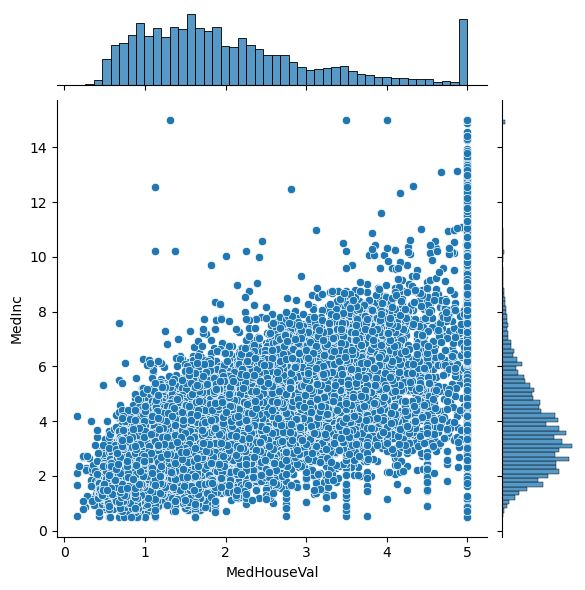

In [94]:
sns.jointplot(file, y = 'MedInc', x = 'MedHouseVal')

In [100]:
file.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

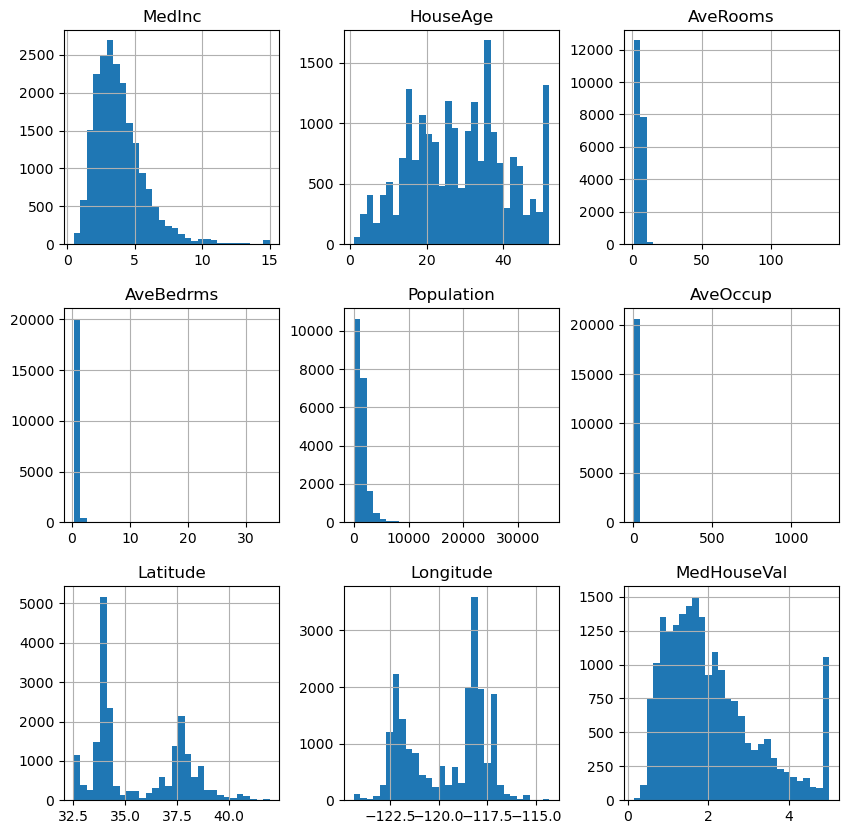

In [121]:
file.hist(figsize=(10,10),bins = 30)
plt.show()

In [122]:
file.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: xlabel='Longitude', ylabel='Latitude'>

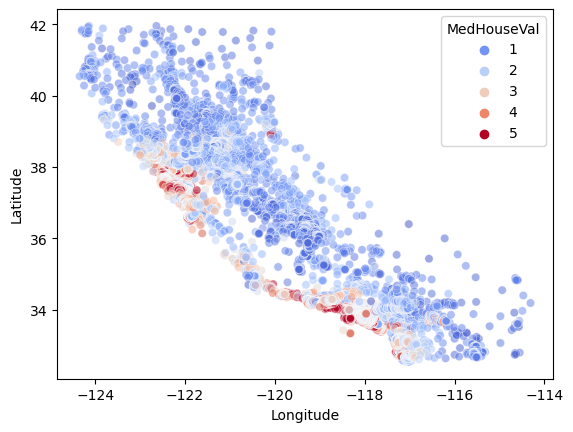

In [129]:
sns.scatterplot(file, x= 'Longitude', y = 'Latitude', hue = 'MedHouseVal', palette='coolwarm', alpha = .5)

<Axes: >

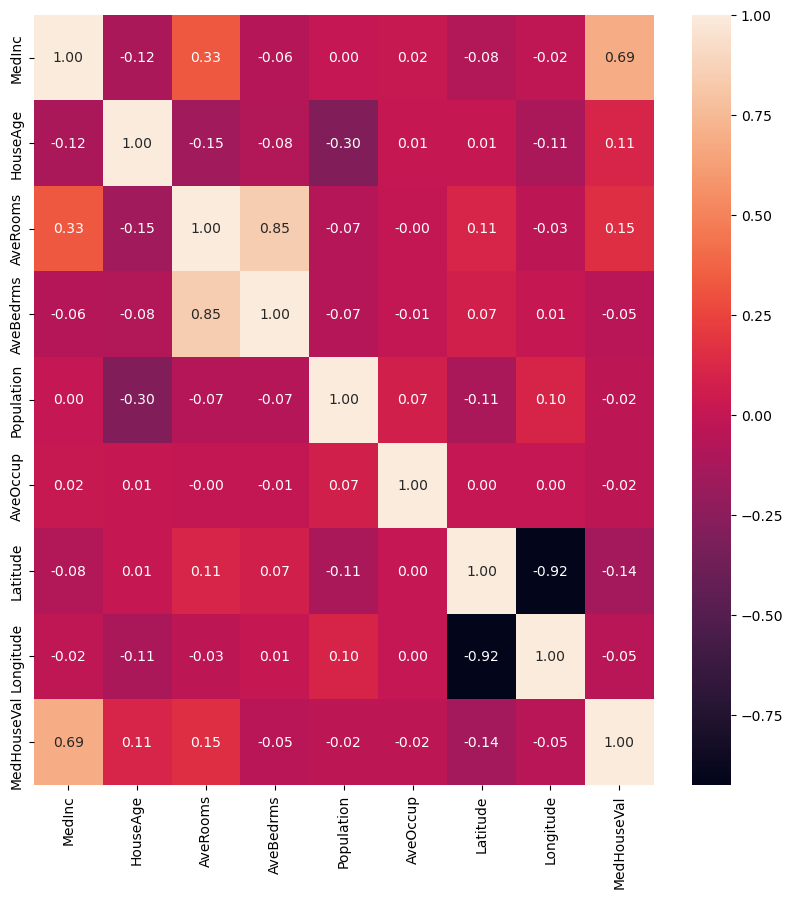

In [140]:
plt.figure(figsize=(10,10))
sns.heatmap(file.corr(),annot=True,fmt='.2f')

In [142]:
from sklearn.model_selection import train_test_split
X = file.drop('MedHouseVal', axis = 1)
y = file['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7)

In [143]:
from sklearn.ensemble import RandomForestRegressor

In [209]:
random_forest_model = RandomForestRegressor(n_estimators=100)

In [210]:
random_forest_model.fit(X_train,y_train)

RandomForestRegressor()

In [211]:
random_forest_prediction = random_forest_model.predict(X_test)

In [212]:
from sklearn.metrics import r2_score, log_loss

In [213]:
r2_score(y_test, random_forest_prediction)

0.7767447712261103

In [165]:
from xgboost import XGBRegressor

In [167]:
xgb_mod = XGBRegressor()

In [168]:
xgb_mod.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [169]:
xgb_prediciton = xgb_mod.predict(X_test)

In [170]:
r2_score(y_test, xgb_prediciton)

0.8127040561633927

In [171]:
from sklearn.metrics import mean_absolute_error

In [173]:
print(mean_absolute_error(y_test, random_forest_prediction))
print(mean_absolute_error(y_test, xgb_prediciton))

0.3654460911302605
0.33811413024500886


In [181]:
prediction_va_actual = pd.DataFrame(y_test)

In [186]:
xgb_test_prediction = xgb_mod.predict(X_test)

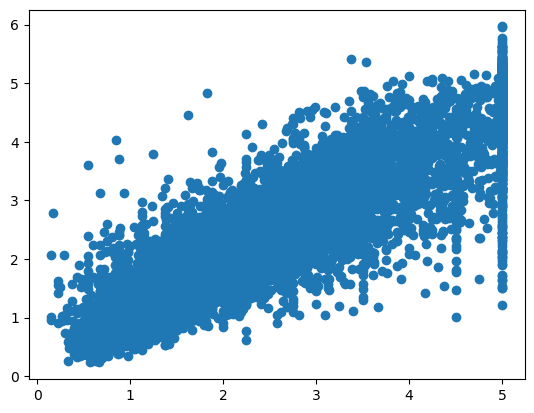

In [187]:
plt.scatter(y_test, xgb_test_prediction)

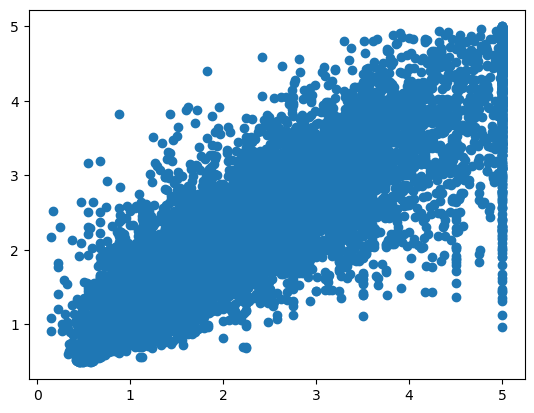

In [188]:
plt.scatter(y_test, random_forest_prediction)